In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def vector_addition(inc1,inc2,Omega1,Omega2,pomega1,pomega2):
    deltaOmega = Omega1-Omega2
    cosimut = np.cos(inc1)*np.cos(inc2)+np.sin(inc1)*np.sin(inc2)*np.cos(deltaOmega)
    imut = np.degrees(np.arccos(cosimut))
    deltapom = np.degrees(pomega2-pomega1+2*np.pi)%360.
    return np.array([deltapom,imut])


In [13]:
file = 'all_planets.csv'
df = pd.read_csv(file,comment="#")
df.columns
pd.set_option('display.max_colwidth', -1)

a_cut = 1.0

jo = (df['pl_discmethod'] == 'Radial Velocity') & (df['pl_bmassj'] >= 0.3)
wj = (df['pl_discmethod'] == 'Radial Velocity') & (df['pl_bmassj'] >= 0.3) & (df['pl_orbsmax'] >= 0.1) & (df['pl_orbsmax'] <= a_cut) 
oc = (df['pl_pnum'] > 1) & (df['pl_discmethod'] == 'Radial Velocity') & (df['pl_bmassj'] >= 0.3) & (df['pl_orbsmax'] > a_cut)
df_jo = df[jo]
df_wj = df[wj]
df_oc = df[oc]
inter = np.intersect1d(df_wj['pl_hostname'].unique(),df_oc['pl_hostname'].unique())
df2 = df[df['pl_hostname'].isin(inter)]
df2_wj = df2[wj]
df2_oc = df2[oc]
df_wjoc = pd.concat([df2_wj,df2_oc],ignore_index=False).sort_index()

ab = df[df['pl_name'] == 'HD 147018 b']['pl_orbsmax']
ac = df[df['pl_name'] == 'HD 147018 c']['pl_orbsmax']
eb = df[df['pl_name'] == 'HD 147018 b']['pl_orbeccen']
ec = df[df['pl_name'] == 'HD 147018 c']['pl_orbeccen']


/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/aci/sw/python/3.6.3_anaconda-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


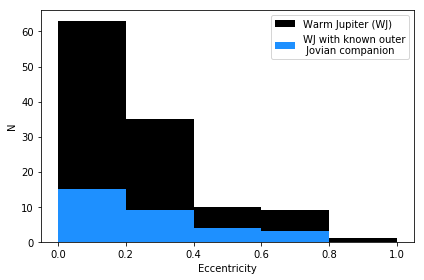

In [45]:
e_jo = df[jo]['pl_orbeccen']
a_jo = df[jo]['pl_orbsmax']
e_wj = df[wj]['pl_orbeccen']
a_wj = df[wj]['pl_orbsmax']
e_wj2 = df2[wj]['pl_orbeccen']
a_wj2 = df2[wj]['pl_orbsmax']
bins = [0.0,0.2,0.4,0.6,0.8,1.0]
counts1, bins1, bars1 = plt.hist(e_wj,bins=bins,label='Warm Jupiter (WJ)',color='black')
counts2, bins2, bars2 = plt.hist(e_wj2,bins=bins,label='WJ with known outer\n Jovian companion',color='dodgerblue')
plt.ylabel('N')
plt.xlabel('Eccentricity')
plt.legend()
plt.tight_layout()
plt.savefig('plots/eccentricity_distribution.pdf',bbox_inches='tight')

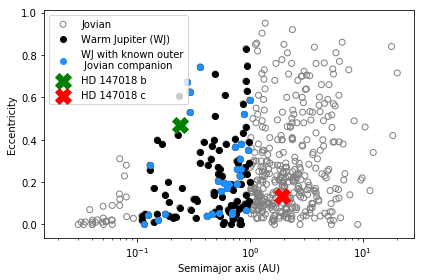

In [44]:
plt.scatter(a_jo,e_jo,label='Jovian',facecolors='none',edgecolors='gray')
plt.scatter(a_wj,e_wj,label='Warm Jupiter (WJ)',color='black')
plt.scatter(a_wj2,e_wj2,label='WJ with known outer\n Jovian companion',color='dodgerblue')
plt.scatter(ab,eb,color='green',label='HD 147018 b',marker='X',s=250)
plt.scatter(ac,ec,color='red',label='HD 147018 c',marker='X',s=250)
plt.legend()
plt.ylabel('Eccentricity')
plt.xlabel('Semimajor axis (AU)')
plt.xscale('log')
plt.tight_layout()
plt.savefig('plots/eccentricity_semimajoraxis.pdf',bbox_inches='tight')

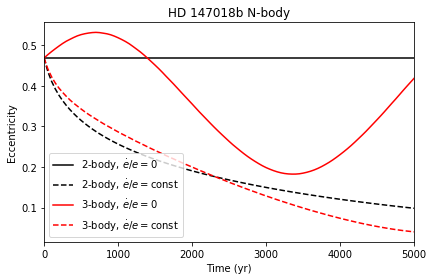

In [67]:
data = np.loadtxt('data/hd147018_tides.20190925T135512.txt')
times = data[:,0]
e1tF,e1tT,e2tF,e2tT = data[:,1],data[:,2],data[:,3],data[:,4]
plt.figure()
plt.plot(times,e1tF,color='black',label=r'2-body, $\dot{e}/e=0$')
plt.plot(times,e1tT,color='black',linestyle='--',label=r'2-body, $\dot{e}/e=\mathrm{const}$')
plt.plot(times,e2tF,color='red',label=r'3-body, $\dot{e}/e=0$')
plt.plot(times,e2tT,color='red',linestyle='--',label=r'3-body, $\dot{e}/e=\mathrm{const}$')
plt.title('HD 147018b N-body')
plt.ylabel('Eccentricity')
plt.xlabel('Time (yr)')
plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend();
#plt.savefig('plots/test_modify_orbits_direct.pdf',bbox_inches='tight')



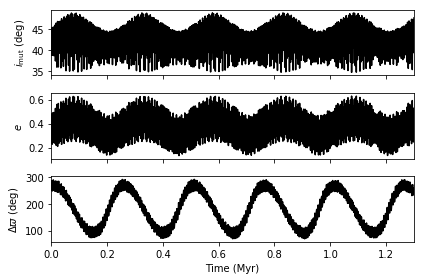

In [9]:
filename = 'N-body.20191005T194745'
data = np.loadtxt('data/'+filename+'.txt')
times = data[:,0]
a1,e1 = data[:,1], data[:,2]
inc1,inc2 = data[:,3], data[:,4]
Omega1,Omega2 = data[:,5], data[:,6]
pomega1,pomega2 = data[:,7], data[:,8]
deltapom,imut = vector_addition(inc1,inc2,Omega1,Omega2,pomega1,pomega2)


fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True) 
plt.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)


ax1.plot(times/1e6,imut,color='black')
ax1.set_ylabel(r'$i_{\mathrm{mut}}$ (deg)')

ax2.plot(times/1e6,e1,color='black')
ax2.set_ylabel(r'$e$')

ax3.plot(times/1e6,deltapom,color='black')
ax3.set_ylabel(r'$\Delta\varpi$ (deg)')
ax3.set_xlabel('Time (Myr)')
ax3.legend(loc="lower left")

plt.tight_layout()
plt.savefig('plots/'+filename+'.pdf',bbox_inches='tight')



459    0.2388
Name: pl_orbsmax, dtype: float64